# Nearest neighbors

This notebook illustrates the classification of the nodes of a graph by the [k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), using the labels known for some nodes.

In [2]:
from IPython.display import SVG

In [3]:
import numpy as np

In [ ]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.classification import NNClassifier, get_accuracy_score
from sknetwork.embedding import Spectral
from sknetwork.visualization import svg_graph, visualize_bigraph

## Graphs

In [ ]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

In [ ]:
labels = {i: labels_true[i] for i in [0, 33]}

In [ ]:
# Nearest neighbors with cosine similarity
classifier = NNClassifier(n_neighbors=1)
labels_pred = classifier.fit_predict(adjacency, labels)

In [ ]:
accuracy = get_accuracy_score(labels_true, labels_pred)
np.round(accuracy, 2)

In [ ]:
image = svg_graph(adjacency, position, labels=labels_pred, seeds=labels)
SVG(image)

In [ ]:
# Nearest neighbors in embedding space
classifier = NNClassifier(n_neighbors=1, embedding_method=Spectral(2))
labels_pred = classifier.fit_predict(adjacency, labels)

In [ ]:
accuracy = get_accuracy_score(labels_true, labels_pred)
np.round(accuracy, 2)

In [ ]:
image = svg_graph(adjacency, position, labels=labels_pred, seeds=labels)
SVG(image)

In [ ]:
# distribution over labels
labels = {i: labels_true[i] for i in [0, 1, 30, 33]}
classifier = NNClassifier(n_neighbors=3, embedding_method=Spectral(2))
classifier.fit(adjacency, labels)
probs = classifier.predict_proba()

In [ ]:
scores = probs[:,1]

In [ ]:
image = svg_graph(adjacency, position, scores=scores, seeds=labels)
SVG(image)

## Directed graphs

In [ ]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [ ]:
rembrandt = 5
klimt = 6
cezanne = 11
labels = {cezanne: 0, rembrandt: 1, klimt: 2}

In [ ]:
classifier = NNClassifier(n_neighbors=2, embedding_method=Spectral(3))
labels_pred = classifier.fit_predict(adjacency, labels)

In [ ]:
image = svg_graph(adjacency, position, names, labels=labels_pred, seeds=labels)
SVG(image)

In [ ]:
# probability distribution over labels (here for scores for the label of Cezanne)
probs = classifier.predict_proba()
scores = probs[:,0]

In [ ]:
image = svg_graph(adjacency, position, names, scores=scores, seeds=[cezanne])
SVG(image)

## Bipartite graphs

In [ ]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [ ]:
inception = 0
drive = 3
budapest = 8

In [ ]:
labels_row = {inception: 0, drive: 1, budapest: 2}

In [ ]:
classifier = NNClassifier(n_neighbors=2, embedding_method=Spectral(3))
classifier.fit(biadjacency, labels_row)
labels_row_pred = classifier.labels_row_
labels_col_pred = classifier.labels_col_

In [65]:
inception = 0
drive = 3
budapest = 8

In [66]:
labels_row = {inception: 0, drive: 1, budapest: 2}

In [67]:
classifier = NNClassifier(n_neighbors=2, embedding_method=Spectral(3))
classifier.fit(biadjacency, labels_row)
labels_row_pred = classifier.labels_row_
labels_col_pred = classifier.labels_col_

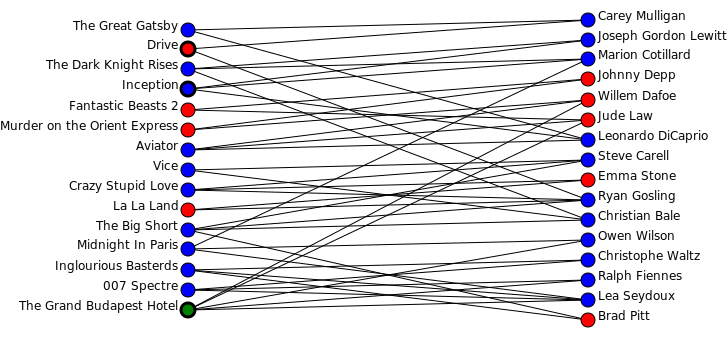

In [68]:
image = visualize_bigraph(biadjacency, names_row, names_col, labels_row_pred, labels_col_pred, seeds_row=labels_row)
SVG(image)

In [69]:
# probability distribution over labels
probs_row = classifier.predict_proba()
probs_col = classifier.predict_proba(columns=True)

In [70]:
scores_row = probs_row[:,1]
scores_col = probs_col[:,1]

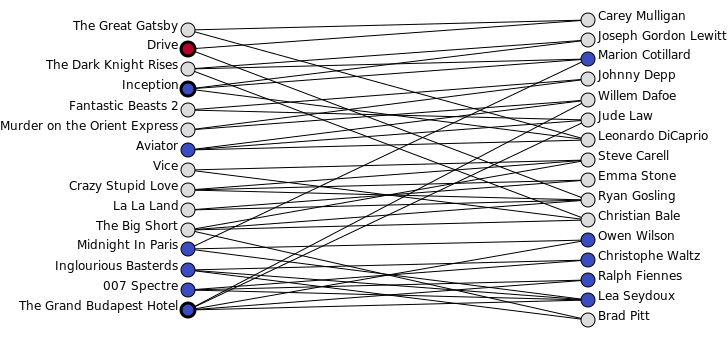

In [71]:
image = visualize_bigraph(biadjacency, names_row, names_col, scores_row=scores_row, scores_col=scores_col,
                    seeds_row=labels_row)
SVG(image)
